# Car Loan Default Prediction - Milestone Report
This report presents the goal of this project, the dataset used and the steps involved in the preparation of this dataset for the application of Machine Learning Classification techniques.

## Context
The field I am exploring is the Vehicle Loaning market.

## Goal
Increase the predictability of a vehicle loan default, based on borrower data, loan data and Bureau data

## Dataset
The dataset I am using is from a Kaggle competition <a href="https://www.kaggle.com/avikpaul4u/vehicle-loan-default-prediction">Vehicle Loan Default Prediction</a>

## Data Preparation
Let's start by loading the data from a .csv file

In [202]:
import pandas as pd

df = pd.read_csv("train.csv", header=0, index_col=0)
df

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,26-10-2018,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,23-10-2018,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,24-10-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


## Checking for missing values

In [203]:
df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

As there is only one column with missing values and they represent around 3% of the dataset, I'll simply remove those rows.

In [351]:
#Remove rows with null values

#First, I'll repeat the data ingestion line.(otherwise, if I run this cell again, I loose the printed data below, because
#I am replacing the original DataFrame with the Cleaned DataFrame)
df = pd.read_csv("train.csv", header=0, index_col=0)

#number of rows before dropping N/A
countBefore = len(df.index)

#Drop N/A
df.dropna(inplace=True)

#number of rows before dropping N/A
countAfter = len(df.index)

#number of rows removed
numRowsRemoved = countBefore - countAfter

#print the number of rows dropped, as well as the percentage those dropped rows represents from the original dataset
print("Number of rows removed:{:d}\n".format(numRowsRemoved))
print("Which represents {:.2f}% of the size of the dataset".format((numRowsRemoved / countBefore)*100))

Number of rows removed:7661

Which represents 3.29% of the size of the dataset


Let's check the columns data type

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 420825 to 630213
Data columns (total 40 columns):
DISBURSED_AMOUNT                       225493 non-null int64
ASSET_COST                             225493 non-null int64
LTV                                    225493 non-null float64
BRANCH_ID                              225493 non-null int64
SUPPLIER_ID                            225493 non-null int64
MANUFACTURER_ID                        225493 non-null int64
CURRENT_PINCODE_ID                     225493 non-null int64
DATE_OF_BIRTH                          225493 non-null object
EMPLOYMENT_TYPE                        225493 non-null object
DISBURSAL_DATE                         225493 non-null object
STATE_ID                               225493 non-null int64
EMPLOYEE_CODE_ID                       225493 non-null int64
MOBILENO_AVL_FLAG                      225493 non-null int64
AADHAR_FLAG                            225493 non-null int64
PAN_FLAG                 

With a quick inspection, we note that the following conversions are needed:<br>
1) Columns DATE_OF_BIRTH and DISBURSAL_DATE: convert from string to DateTime format<br>
2) Columns AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH: should be a number. Let's inspect and try to convert<br>
3) Every column ending in "ID" should be converted to categorical. Later, when we apply the classification methods, we we'll use the pandas get_dummies functions to generate numerical columns out of these categories<br>


Starting with 1)

In [352]:
#1) Convert Columns DATE_OF_BIRTH and DISBURSAL_DATE from string to DateTime format
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])

#Check if conversion succeeded
df[['DATE_OF_BIRTH', 'DISBURSAL_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 420825 to 630213
Data columns (total 2 columns):
DATE_OF_BIRTH     225493 non-null datetime64[ns]
DISBURSAL_DATE    225493 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 5.2 MB


2) For the other two columns, first let's check how the data looks like in those columns

In [207]:
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
UNIQUEID,,
420825,0yrs 0mon,0yrs 0mon
537409,1yrs 11mon,1yrs 11mon
417566,0yrs 0mon,0yrs 0mon
624493,0yrs 8mon,1yrs 3mon
539055,0yrs 0mon,0yrs 0mon


These columns need to have their values converted to a float type

In [353]:
#module for string manipulation
import re

#define a function that strips the numbers from the string. The first number (token[0]) is the number of years,
#the second number (token[1]) is the number of months, which is converted to year and added to token[0]
def convertPeriod(str):
    tokens = re.findall("\d+", str)    
    return int(tokens[0]) + round(int(tokens[1])/12,2)

#loop through the two columns and apply the conversion
for col in ['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']:
    df[col] = df[col].apply(lambda x:convertPeriod(x)) 

#check to see if successful
df[['AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
UNIQUEID,,
420825,0.00,0.00
537409,1.92,1.92
417566,0.00,0.00
624493,0.67,1.25
539055,0.00,0.00


3) Columns ending in "ID" should be categories

In [354]:
#create a list with columns ending in ID
ID_cols = [col for col in df.columns if col[-2:] == "ID"]

#convert to category
for col in ID_cols:
    df[col] = df[col].astype(str)

#check to see if successful    
df[ID_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 420825 to 630213
Data columns (total 6 columns):
BRANCH_ID             225493 non-null object
SUPPLIER_ID           225493 non-null object
MANUFACTURER_ID       225493 non-null object
CURRENT_PINCODE_ID    225493 non-null object
STATE_ID              225493 non-null object
EMPLOYEE_CODE_ID      225493 non-null object
dtypes: object(6)
memory usage: 12.0+ MB


The next step is to identify categorical columns and check unique values. We may find inconsistencies or typos

In [355]:
#create a list of columns with data type object
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

#print unique values from each column
def printUniqueValues(colsList):
    print("Columns name  -  Unique values")
    for col in colsList:
        print("--------------------------------------------------------------------------------")
        print(col," - ",sorted(df[col].unique()))
        
printUniqueValues(cat_cols)

Columns name  -  Unique values
--------------------------------------------------------------------------------
BRANCH_ID  -  ['1', '10', '100', '101', '103', '104', '105', '11', '111', '117', '120', '121', '13', '130', '135', '136', '138', '14', '142', '146', '147', '15', '152', '153', '158', '159', '16', '160', '162', '165', '17', '18', '19', '2', '20', '202', '207', '217', '248', '249', '250', '251', '254', '255', '257', '258', '259', '260', '261', '29', '3', '34', '35', '36', '42', '43', '48', '5', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '72', '73', '74', '76', '77', '78', '79', '8', '82', '84', '85', '9', '97']
--------------------------------------------------------------------------------
SUPPLIER_ID  -  ['10524', '12311', '12312', '12374', '12441', '12456', '12500', '12534', '12539', '12797', '12842', '12878', '13131', '13295', '13317', '13448', '13512', '13612', '13890', '13895', '13909', '13913', '13924', '13926', '13928', '13929', '13931', '13937', '

PERFORM_CNS_SCORE_DESCRIPTION  -  ['A-Very Low Risk', 'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk', 'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Medium Risk', 'J-High Risk', 'K-High Risk', 'L-Very High Risk', 'M-Very High Risk', 'No Bureau History Available', 'Not Scored: More than 50 active Accounts found', 'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 'Not Scored: Not Enough Info available on the customer', 'Not Scored: Only a Guarantor', 'Not Scored: Sufficient History Not Available']


First thing to note is that the columns "SUPPLIER_ID", "CURRENT_PINCODE_ID" and "EMPLOYEE_CODE_ID" have way too many unique values. We may use them for analysis, but, considering that each unique value will generate a new column, there won't be enough data in each new column. With that in mind, for the classification process, we might have to drop these columns.


As for the other columns, no typos were found. However, we notice that PERFORM_CNS_SCORE_DESCRIPTION is associated with PERFORM_CNS_SCORE. There may be inconsistencies between those 2 columns that can be easily spotted in graphical form. I will use a boxplot from the Seaborn library to check that there are no overlaps.<br><br>
<b>PS:</b> This is needed because I don't know if the data on the description column was automatically filled when the score was entered, so I need to verify.

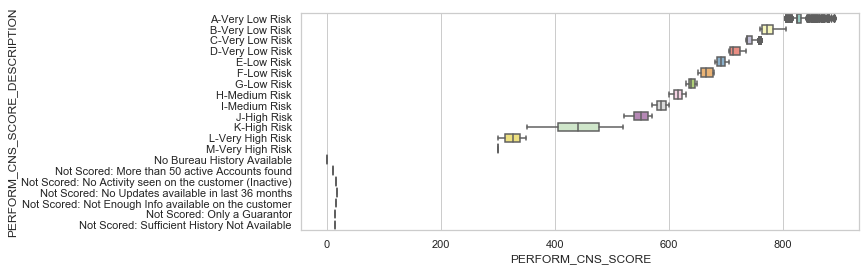

In [356]:
#import Seaborn and matplotlib.pyplot Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#sort values by column description and store in a DataFrame object
df_sorted = df[["PERFORM_CNS_SCORE_DESCRIPTION", "PERFORM_CNS_SCORE"]].sort_values(by="PERFORM_CNS_SCORE_DESCRIPTION")

#Boxplot
ax = sns.boxplot(x="PERFORM_CNS_SCORE", y="PERFORM_CNS_SCORE_DESCRIPTION",palette="Set3", data=df_sorted)
plt.rcParams["figure.figsize"] = (1,2)
plt.show()

We can easily notice that there are no overlaps. Good data input methods were applied to generate this data.<br>
Those two columns are correlated. To guarantee better performance of the classification methods we will apply later in the project, we should keep only one of them. The categories that does not start with a letter (7 last in the plot) are merely codes, not bearing any meaning in a scale, as opposed to the other columns where the scores represents a quantity. For our purposes, let's consider these scores as codes, so we can use all the data. As a consequence, column PERFORM_CNS_SCORE will be dropped.


In [357]:
#drop scores column
df_noScore = df.drop("PERFORM_CNS_SCORE",axis=1)

#check if column is gone
assert "PERFORM_CNS_SCORE" not in df_noScore.columns

Now let's look for outliers in the numerical columns. <br>
The two most important columns are "DISBURSED_AMOUNT" and "ASSET_COST". Even though the percentage of the Asset cost may vary, we should see a positive correlation between those amounts. Let's do a scatter plot to verify that

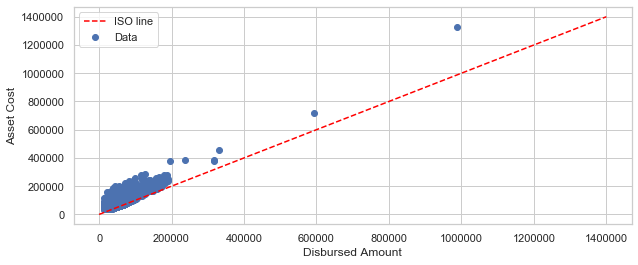

In [361]:
#create scatter plot
plt.scatter(x=df_noScore.DISBURSED_AMOUNT, y=df_noScore.ASSET_COST, label='Data')
plt.plot([0,1400000], [0,1400000], '--',color='red', label='ISO line' )
plt.xlabel('Disbursed Amount')
plt.ylabel('Asset Cost')
plt.rcParams["figure.figsize"] = (10,40)
plt.legend()
plt.show()

We notice that the data has outliers, however they do not alter the shape of a regression line. They are "aligned" with the rest of the data, so they will be kept.<br>
I included a ISO line to verify that every Asset Cost Value is greater than the Disbursed Amount. To double-check, there are three ways of doing it: <br>
- Check the LTV (Loan to Value of the asset) column to check if any value is > 100;
- Zoom in on the plot for Disbursed Amounts between 0 and $200,000 or
- Count the number of rows where the Disbursed Amount is greater than the Cost Value.<br>

I will use the last two options. Starting with a "zoomed" plot:

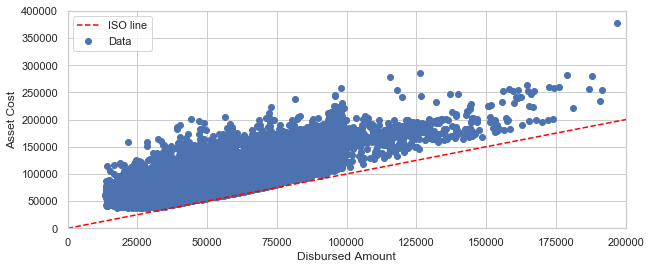

In [363]:
#zooming in on x=[0, 200000]
plt.scatter(x=df_noScore.DISBURSED_AMOUNT, y=df_noScore.ASSET_COST, label='Data')
plt.plot([0,1400000], [0,1400000], '--',color='red', label='ISO line' )
plt.xlabel('Disbursed Amount')
plt.ylabel('Asset Cost')
plt.rcParams["figure.figsize"] = (10,40)
plt.xlim(0,200000)
plt.ylim(0, 400000)
plt.legend()
plt.show()

Looks like no error was made on these two columns, now let's double check by counting the number or records that satisfy Disbursed Amount > Asset Cost. This count should be zero

In [237]:
print(df_noScore[df_noScore.DISBURSED_AMOUNT > df_noScore.ASSET_COST]["DISBURSED_AMOUNT"].count())

0


Following our analysis, let's get to the most important Column to analyse: our target column LOAN_DEFAULT. A few questions come to mind:<br>
1) Is the Bureau Score reliable? At least low-risk clients should almost never default and high-risk clients should have a high default rate<br>
2) Does the default rate increase as the Disbursed Amount increase?<br>
3) Average default rate by Employment type, State, Branch, Employee ID, ...<br>
4) Is the age of the client relevant?

In [438]:
# First, let's define a function to build a dictionary where the keys = bin and values = Default Rate 
def buildDict(df, bins, col_name, gt10=False):
# Arguments description:
#  - df - DataFrame that contains the data
#  - bins - how the data is grouped
#  - col_name - Column from where the bins will be extracted
#  - gt10 - Boolean. If True, only bins that have more than 10 data points will be taken into consideration
    
    #create an empty dictionary
    aDict = {}
    
    #loop through bins
    for bin in bins:        
        if(gt10==False):
            # For each bin, forced to be a string (otherwise employee code is interpreted as number),
            # I calculate the total defaults / total dat apoints in that bin            
            aDict[str(bin)] = 100*(sum(df[df[col_name] == bin]["LOAN_DEFAULT"])/
                                  df[df[col_name] == bin]["LOAN_DEFAULT"].count())
        else:
            # Only bins with more than 10 data points will be considered
            if(df[df[col_name] == bin]["LOAN_DEFAULT"].count()>10):
                aDict[str(bin)] = 100*(sum(df[df[col_name] == bin]["LOAN_DEFAULT"])/
                                  df[df[col_name] == bin]["LOAN_DEFAULT"].count())    
    
    return aDict

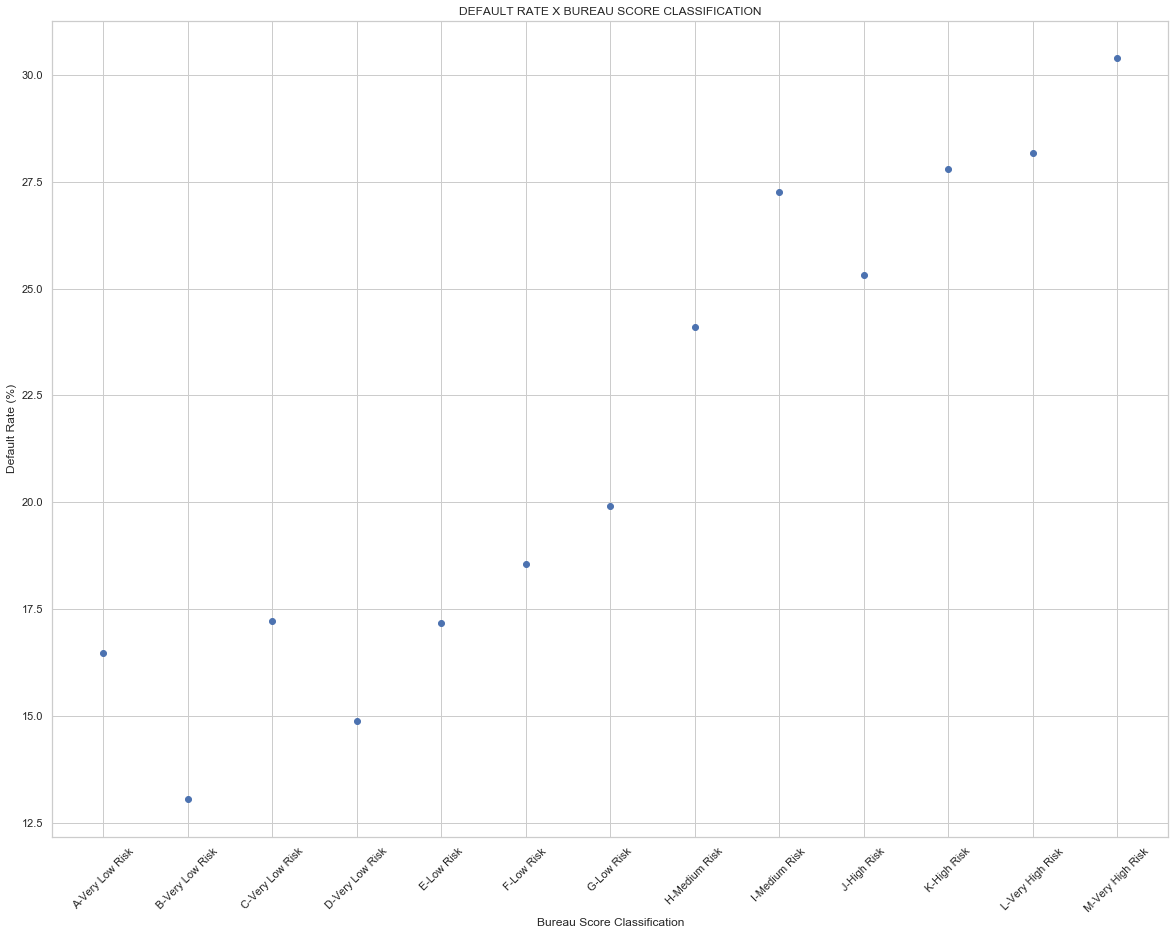

In [456]:
#1) Is the Bureau Score reliable?

# To answer this questions, I will plot default rate X BUREAU SCORE CLASSIFICATION

# The column PERFORM_CNS_SCORE_DESCRIPTION is already separated into bins. I'll only consider the bins that starts 
# with a letter, which corresponds to the Bureau classification.
# The defautl rate will be calculated to each bin
    
# create a list of bins to be considered
score_bins = [bin for bin in sorted(df_noScore.PERFORM_CNS_SCORE_DESCRIPTION.unique()) if bin[0] != "N"]

# call dictionary building function
myDict = buildDict(df_noScore, score_bins, "PERFORM_CNS_SCORE_DESCRIPTION")

# plot decorations
plt.scatter(x=myDict.keys(), y=myDict.values())
plt.xticks(rotation=45)
plt.ylabel("Default Rate (%)")
plt.xlabel("Bureau Score Classification")
plt.title("DEFAULT RATE X BUREAU SCORE CLASSIFICATION")
plt.show()



We can easily identify an upwards trend, as expected. It is interesting to notice that someone classified as Very High Risk is almost 20% more likely to default their loans, compared to someone classified as Very Low Risk

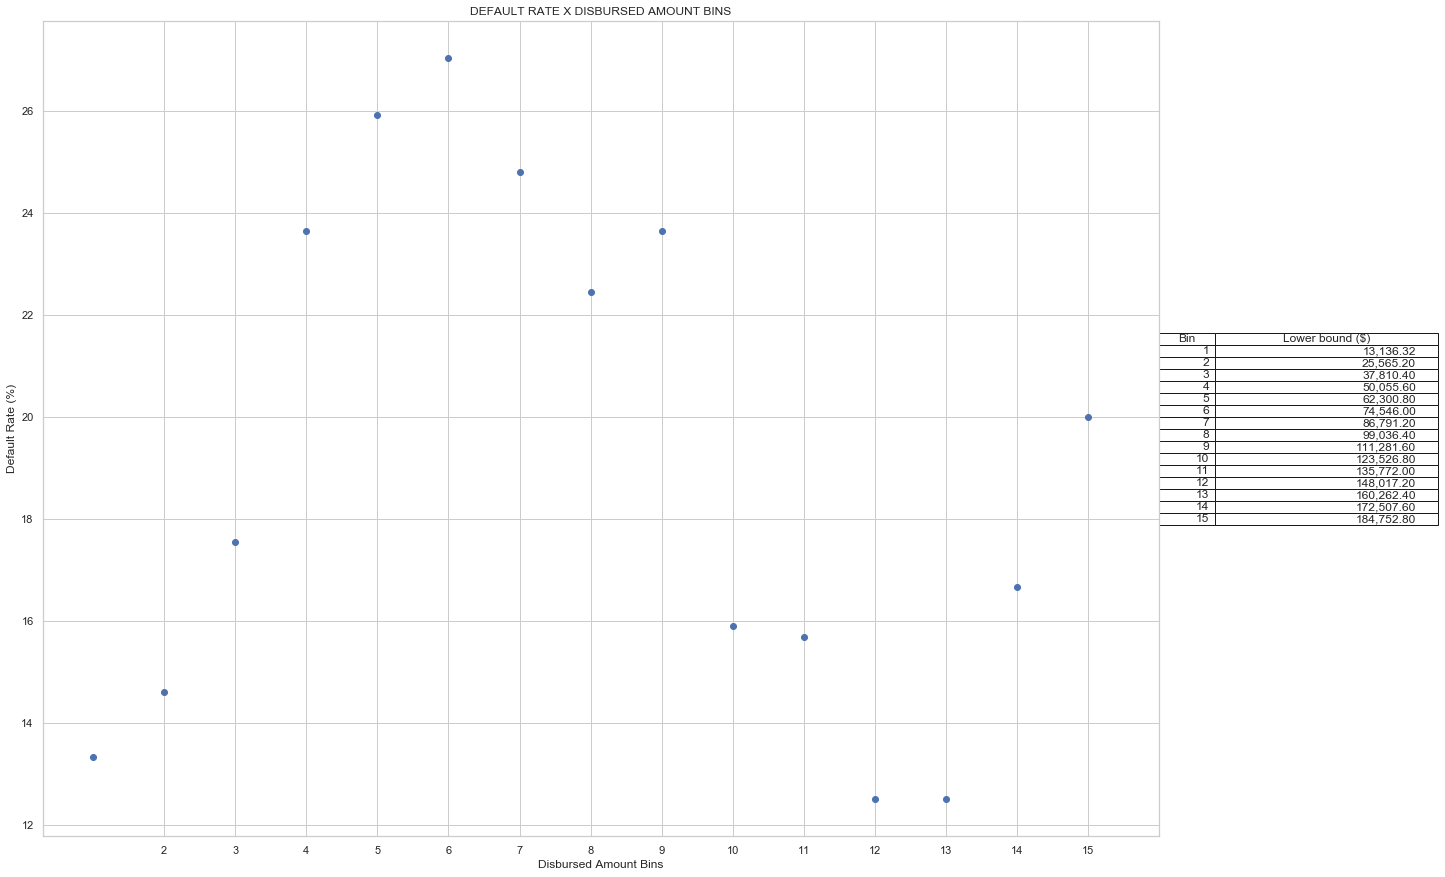

In [455]:
#2) Does the default rate increase as the Disbursed Amount increase?

# To tackle this question, I'll first disconsider Disbursed Amounts greater than $200,000. Next step is to separate the
# amounts into bins. Finally, I'll follow the steps taken to answer the previous question

# Create DataFrame with only Disbursed Amounts < $200,000
df_toPlot = df_noScore[df_noScore.DISBURSED_AMOUNT < 200000]

# Create the bins
df_toPlot.loc[:,'DisbBins'], lbBins = pd.cut(df_toPlot.loc[:, "DISBURSED_AMOUNT"], 15, labels=np.arange(1,16), retbins=True)

# Round lower Bound of the bins to have 2 decimal places
lbBins = ["{0:,.2f}".format(x) for x in lbBins]

# Call dictionary building function defined on previous cell
myDict = buildDict(df_toPlot, np.arange(1,16), "DisbBins")

# Prepare Scatter plot
plt.scatter(x=myDict.keys(), y=myDict.values())
plt.xticks(np.arange(1,16))
plt.ylabel("Default Rate (%)")
plt.xlabel("Disbursed Amount Bins")
plt.title("DEFAULT RATE X DISBURSED AMOUNT BINS")
plt.rcParams["figure.figsize"] = (20,15)

#plot table with bins and the lower bounds for reference
the_table = plt.table(cellText=list(zip(myDict.keys(),lbBins)),
                      colLabels=["Bin", "Lower bound ($)"],
                      loc = 'right',
                      colWidths = [0.05,0.2])
plt.show()


Contrary to my expectation, the Default Rate does not have a linear relationship with the Disbursed Amount

In [453]:
# 3) Average default rate by Employment type, State, Branch, Employee ID, ...

# These questions can all be answered using the same logic. The goal here is to define a function to plot a bar plot
# for each of those categories

def plotBarPlot(df, col):
# For any categorical column, this function plots, in descending order, the top 10 Default Rate for each bin

    # the bins are the unique values of the categorical column
    bins = sorted(df[col].unique())  
    
    # Call the function defined earlier that builds the dictionary (key=bin, value=Default Rate)
    myDict = buildDict(df, bins, col, True)
    
    # Create a DataFrame out of the dictionary to make ordering simpler
    df_aux = pd.DataFrame(data=myDict.values(), index=myDict.keys(), columns=["Default_Rate"])    
    
    # Boolean to verify if there are more than 10 categories
    mt10 = False
    # Slice the top 10
    if(len(df_aux)>10):
        df_aux = df_aux.sort_values(by=['Default_Rate'], ascending=False)[:10]
        mt10 = True
    else:
        df_aux = df_aux.sort_values(by=['Default_Rate'], ascending=False)       
    
    # Prepare bar plot
    plt.bar(x=df_aux.index, height=df_aux.Default_Rate)
    plt.ylabel("Default Rate (%)")
    if(mt10==True):
        plt.xlabel(col.replace("_", " ") + " (top 10)")
    else:
        plt.xlabel(col.replace("_", " "))
    plt.title("DEFAULT RATE X " + col.replace("_", " "))
    plt.show()

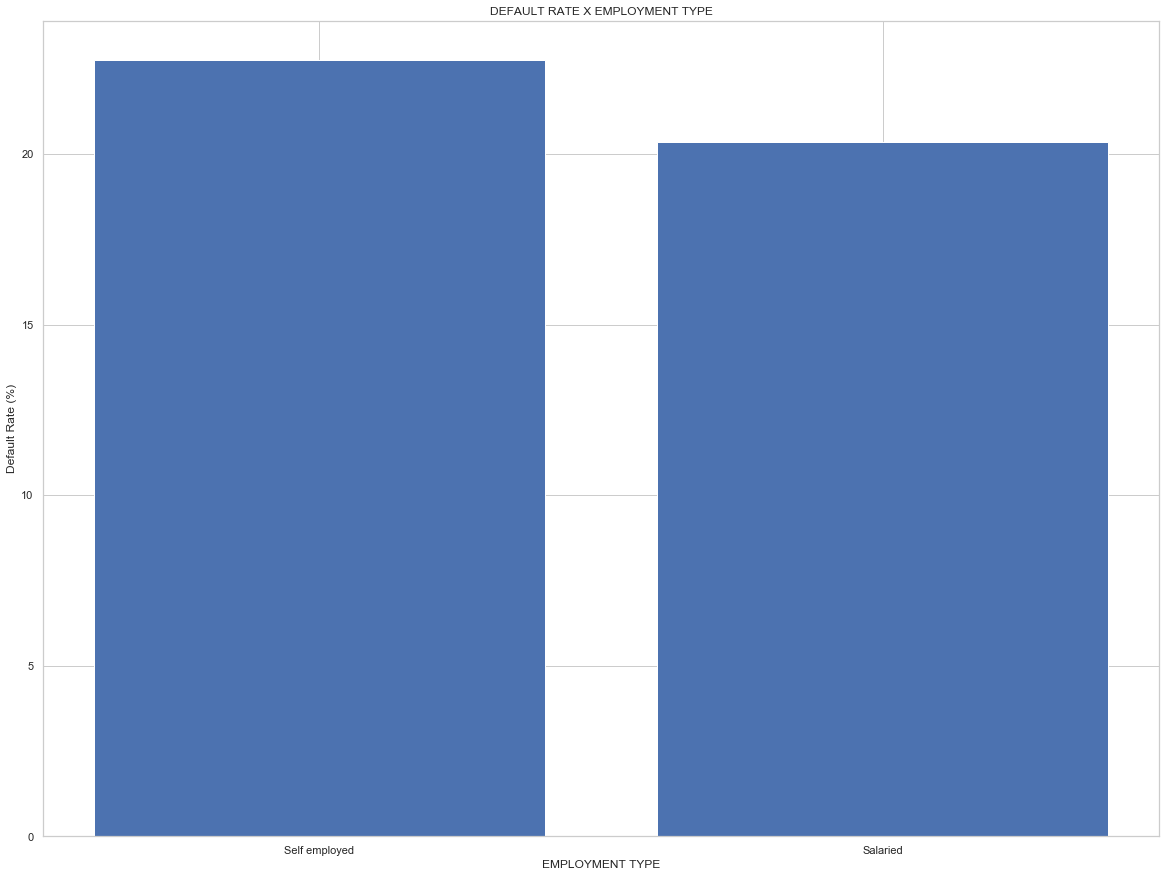

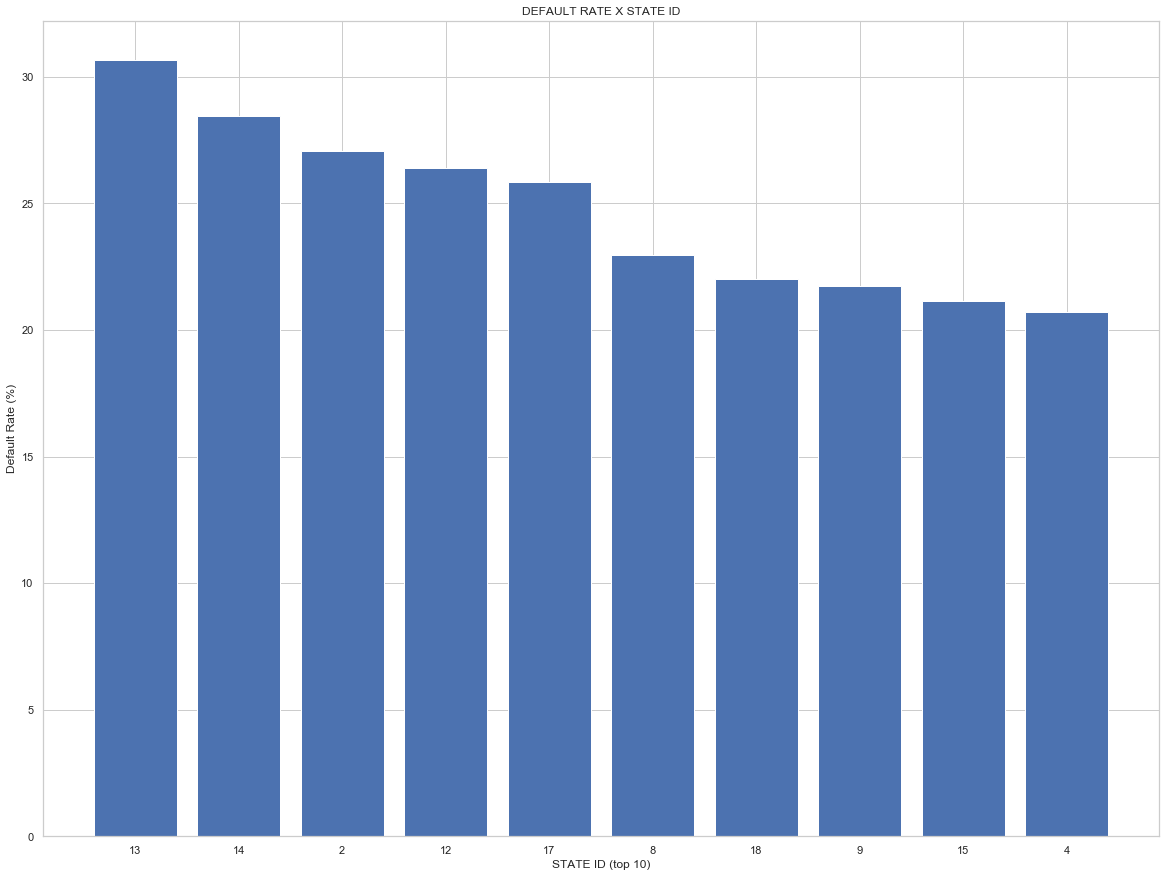

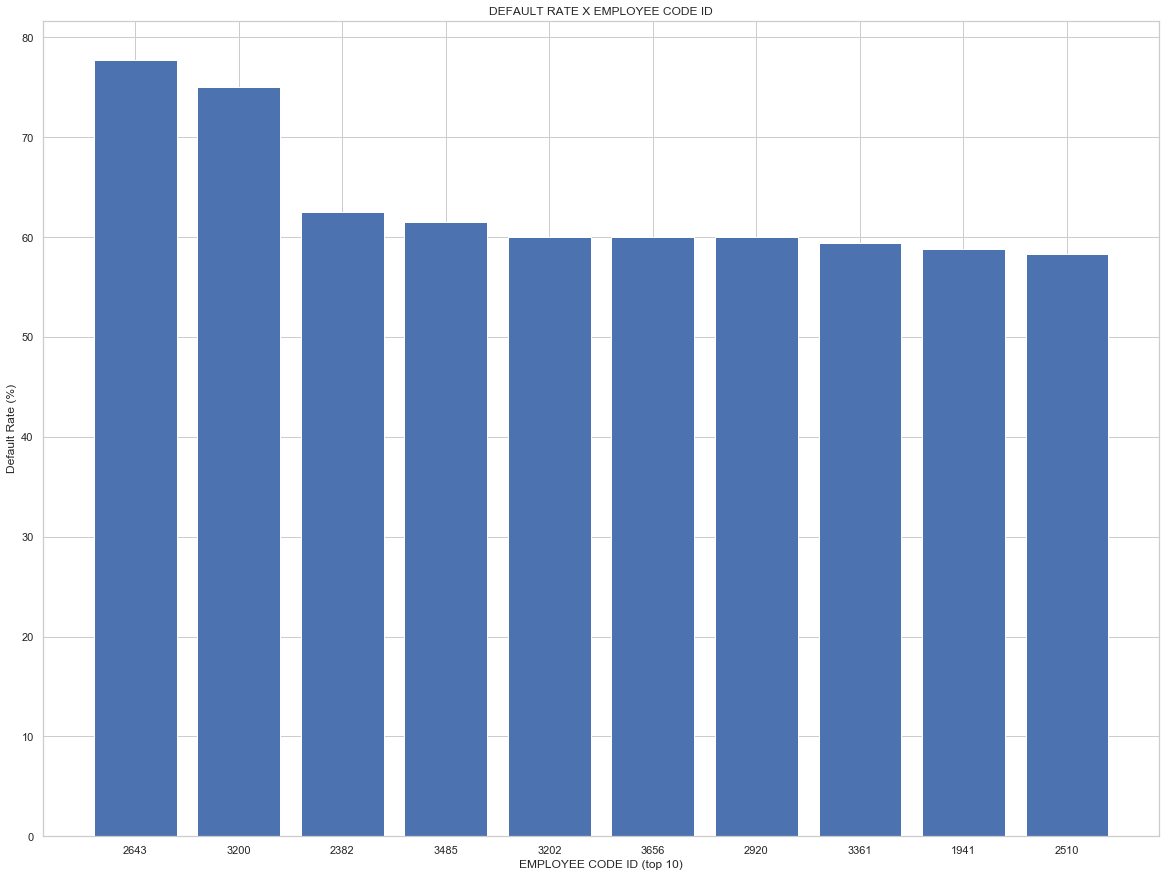

In [454]:
# Call the function for 3 categorical columns
for col in ["EMPLOYMENT_TYPE", "STATE_ID", "EMPLOYEE_CODE_ID"]:
    plotBarPlot(df_noScore, col)

There is not a relevant diffence on the Default rate when it comes to Employment type or State. However, it amazes me that there are <b>employees who have a Default Rate of almost 80%.</b> These are employees that approved loans for at least 10 clients. Considering that the average Default Rate is around 20%, some measures should be taken regarding this issue (training? investigation? Improve software?)<br><br>

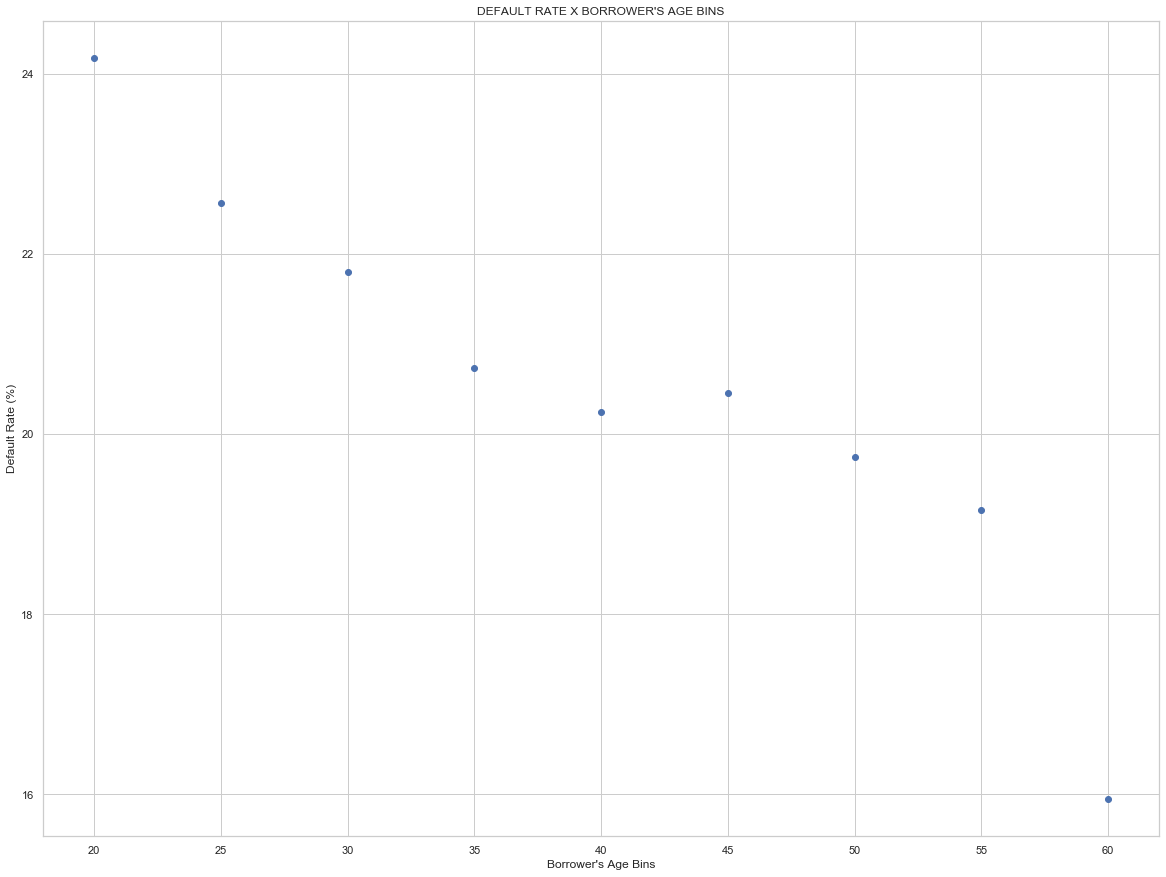

In [452]:
# 4) Is the age of the client relevant?

# First, let's create a column with the age of the borrower on the date of the Disbursement
df_noScore["AGE"] = (df_noScore["DISBURSAL_DATE"] - df_noScore["DATE_OF_BIRTH"])/np.timedelta64(1,'Y')

# With the following statement, I figured out the bounds, which are 20.090761617281668 64.78983141337605
# print(min(df_noScore["AGE"]),max(df_noScore["AGE"]))

# Make a copy of the DataFrame because the age bins are irrelevant to the classification methods
df_toPlot = df_noScore

# Build Age Bins
df_toPlot.loc[:,'ageBins'], lbBins = pd.cut(df_toPlot.loc[:, "AGE"],bins = np.arange(20,70, 5), labels=np.arange(20,65, 5), retbins=True)

# Call dictionary building function
myDict = buildDict(df_toPlot, np.arange(20,65, 5), "ageBins")

# Prepare Scatter plot
plt.scatter(x=myDict.keys(), y=myDict.values())
#plt.xticks(np.arange(20,65, 5))
plt.ylabel("Default Rate (%)")
plt.xlabel("Borrower's Age Bins")
plt.title("DEFAULT RATE X BORROWER'S AGE BINS")
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

Even though the differences aren't considerable, we can see a downwards trend, meaning that yonger people are (a little) more likely to Default their loans.

# I will now wait for my mentor to validate this Data Wrangling and Data Analysis part so I can carry on with the Classification methods